In [1]:
#Endividamento das famílias e Taxa de Juros

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("dataset_unificado.csv")

df["Data"] = pd.to_datetime(df["Data"], format="%m/%Y")
endividamento = df["29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"]
selic = df["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."]

endividamento = endividamento.astype(str).str.replace(",", ".").astype(float)
selic = selic.astype(str).str.replace(",", ".").astype(float)

#Novo dataframe com as colunas de interesse
endividamento_e_selic = pd.DataFrame({"Data" : df["Data"], 
                                      "Endividamento das famílias" : endividamento,
                                      "Taxa de Juros" : selic
                                      })

print(endividamento_e_selic)

          Data  Endividamento das famílias  Taxa de Juros
0   2006-12-01                       21.98          13.19
1   2007-01-01                       22.28          13.13
2   2007-02-01                       22.48          12.93
3   2007-03-01                       22.40          12.74
4   2007-04-01                       22.36          12.58
..         ...                         ...            ...
215 2024-11-01                       48.29          11.04
216 2024-12-01                       48.43          11.77
217 2025-01-01                       48.62          12.24
218 2025-02-01                       48.49          13.15
219 2025-03-01                       48.56          13.57

[220 rows x 3 columns]


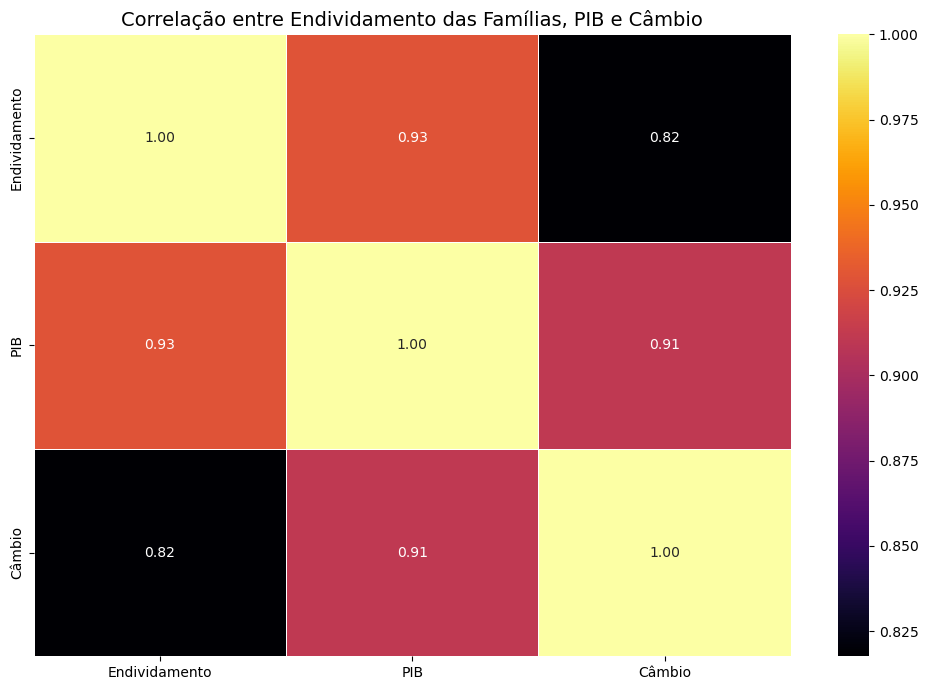

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_unificado.csv")
df["Data"] = pd.to_datetime(df["Data"], format="%m/%Y")

df["Endividamento"] = df["29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"].astype(str).str.replace(",", ".").astype(float)
df["PIB"] = df["4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)"].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
df["Câmbio"] = df["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"].astype(str).str.replace(",", ".").astype(float)

df_corr = df[["Endividamento", "PIB", "Câmbio"]]

matriz_correlacao = df_corr.corr()

#heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_correlacao, annot=True, cmap="inferno", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Endividamento das Famílias, PIB e Câmbio", fontsize=14)
plt.tight_layout()
plt.show()




In [3]:
#Medidas sobre Endividamento e Taxa de Juros

média_endividamento = np.mean(endividamento)
média_taxa_de_juros = np.mean(selic)

dp_endividamento = np.std(endividamento)
dp_taxa_de_juros = np.std(selic)

#Correlação entre endividamento e taxa de juros
correlação_endiv_selic = np.corrcoef(endividamento, selic)[0,1]

print(média_endividamento)
print(média_taxa_de_juros)

print(dp_endividamento)
print(dp_taxa_de_juros)

print(correlação_endiv_selic)

38.25354545454546
9.894681818181818
7.217308436398967
3.299815475369433
-0.08059071151680144


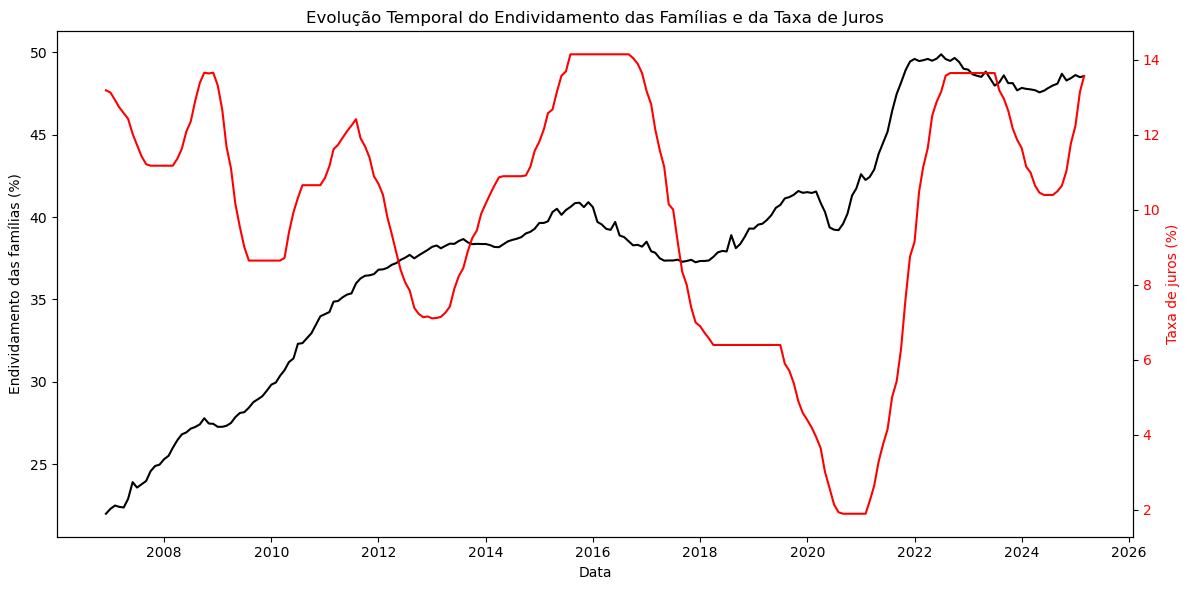

In [4]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=endividamento_e_selic, x="Data", y="Endividamento das famílias", ax=ax1, color="black")
ax1.set_ylabel("Endividamento das famílias (%)", color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.grid(False)


# Segundo eixo Y (taxa de juros)
ax2 = ax1.twinx()

sns.lineplot(data=endividamento_e_selic, x="Data", y="Taxa de Juros", ax=ax2, color="red")
ax2.set_ylabel("Taxa de juros (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.grid(False)

plt.title("Evolução Temporal do Endividamento das Famílias e da Taxa de Juros")
fig.tight_layout()

plt.show()




In [5]:
#Relação entre endividamento das famílias e PIB

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_unificado.csv")

df["Data"] = pd.to_datetime(df["Data"], format="%m/%Y")
endividamento = df["29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"]
pib = df["4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)"]

endividamento = endividamento.astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
pib = pib.astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

endividamento_e_pib = pd.DataFrame({"Data" : df["Data"], 
                                  "Endividamento das famílias" : endividamento, 
                                  "PIB" : pib

})

print(endividamento_e_pib)

          Data  Endividamento das famílias        PIB
0   2006-12-01                       21.98   215338.3
1   2007-01-01                       22.28   206662.3
2   2007-02-01                       22.48   201552.1
3   2007-03-01                       22.40   223208.6
4   2007-04-01                       22.36   218931.2
..         ...                         ...        ...
215 2024-11-01                       48.29  1027050.4
216 2024-12-01                       48.43  1003039.7
217 2025-01-01                       48.62   950827.4
218 2025-02-01                       48.49   977326.4
219 2025-03-01                       48.56  1063076.3

[220 rows x 3 columns]


In [6]:
#Medidas sobre Endividamento e PIB


média_endividamento = np.mean(endividamento)
média_pib = np.mean(pib)

dp_endividamento = np.std(endividamento)
dp_pib = np.std(pib)

#Correlação entre endividamento e taxa de juros
correlação_endiv_pib = np.corrcoef(endividamento, pib)[0,1]

print(correlação_endiv_pib)

rquadrado = correlação_endiv_pib ** 2
print(rquadrado)


0.9287494833232774
0.8625756027732548


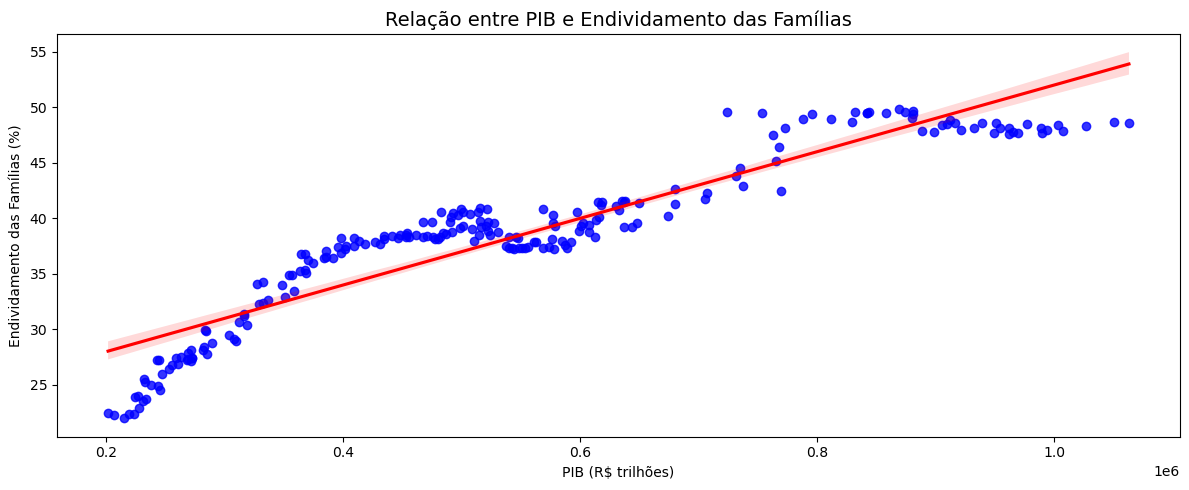

In [7]:
# Gráfico de regressão entre Endividamento das Famílias e PIB
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.regplot(x=pib, y=endividamento, color='blue', line_kws={"color": "red"})
plt.title("Relação entre PIB e Endividamento das Famílias", fontsize=14)
plt.xlabel("PIB (R$ trilhões)")
plt.ylabel("Endividamento das Famílias (%)")
plt.grid(False)
plt.tight_layout()
plt.show()


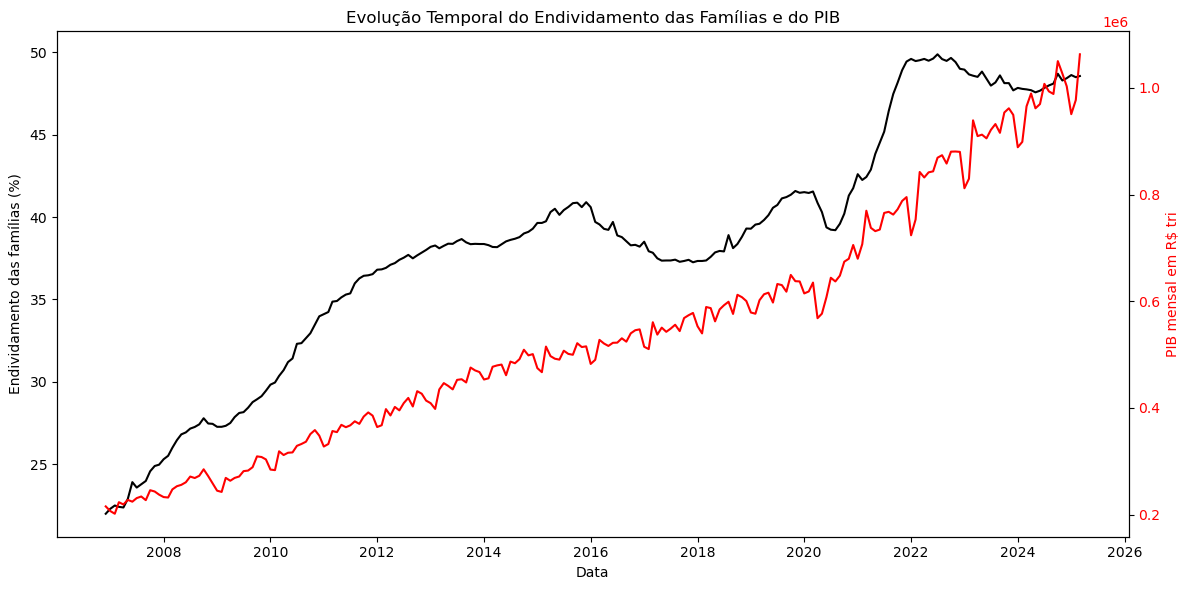

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns


fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=endividamento_e_pib, x="Data", y="Endividamento das famílias", ax=ax1, color="black")
ax1.set_ylabel("Endividamento das famílias (%)", color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.grid(False)


ax2 = ax1.twinx()

sns.lineplot(data=endividamento_e_pib, x="Data", y="PIB", ax=ax2, color="red")
ax2.set_ylabel("PIB mensal em R$ tri", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.grid(False)

#Detalhes
plt.title("Evolução Temporal do Endividamento das Famílias e do PIB")
fig.tight_layout()

plt.show()